### Loading dataset


In [1]:
import pandas as pd
import os
%matplotlib inline

DATA_FOLDER = 'data/raw/'

CHARACTER_METADATASET = DATA_FOLDER+"character.metadata.tsv"
MOVIE_METADATASET = DATA_FOLDER+"movie.metadata.tsv"
PLOT_SUMMARIES = DATA_FOLDER+"plot_summaries.txt"
NAME_CLUSTER = DATA_FOLDER+"name.clusters.txt"
TVTROPES = DATA_FOLDER+"tvtropes.clusters.txt"

In [2]:
print("Current working directory:", os.getcwd())


Current working directory: c:\Users\Pauline\Documents\EPFL\Master\MA3\ada\ada-2024-project-dondata2025


#### Character

In [3]:
# Character metadata
character = pd.read_csv(CHARACTER_METADATASET, delimiter='\t')
print("shape:", character.shape)
character.head(2)



shape: (450668, 13)


,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,Unnamed: 7,Wanda De Jesus,42,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
1,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l


In [4]:
# Naming the columns of the dataframes
character.columns = ['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Release_date','Character_name', 'Actor_DOB', 'Actor_gender', 'Actor_height', 'Actor_ethnicity', 'Actor_name', 'Actor_age', 'Freebase_character_map', ' Freebase character ID','Freebase actor ID '] 

#creating a header line for the movie_metadata
character.head(2)

,Wikipedia_movie_ID,Freebase_movie_ID,Release_date,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age,Freebase_character_map,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
1,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l


In [5]:
# is wikipedia_movie_ID unique?
print("wikipedia_movie_ID unique?", character.Wikipedia_movie_ID.is_unique)


wikipedia_movie_ID unique? False


In [6]:
#what is the type of wikipedia_movie_ID?
print("wikipedia_movie_ID type:", character.Wikipedia_movie_ID.dtype)


wikipedia_movie_ID type: int64


In [7]:
# print the line of the 3196793 wikipedia_movie_ID
character[character.Wikipedia_movie_ID == 3196793].head()


,Wikipedia_movie_ID,Freebase_movie_ID,Release_date,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age,Freebase_character_map,Freebase character ID,Freebase actor ID
16,3196793,/m/08yl5d,2000-02-16,Police Officer,NaN,M,NaN,NaN,Allen Cutler,NaN,/m/0lr37fl,/m/0lr3z80,/m/0h8pnlw
17,3196793,/m/08yl5d,2000-02-16,Reporter,1956-12-19,F,NaN,NaN,Alice Barrett,43.0,/m/0lr37d8,/m/0lr3z8g,/m/034dbm
18,3196793,/m/08yl5d,2000-02-16,NaN,NaN,M,NaN,NaN,Rod Britt,NaN,/m/0lr37gd,NaN,/m/0lr37gh
19,3196793,/m/08yl5d,2000-02-16,NaN,NaN,F,NaN,NaN,Hildy Brooks,NaN,/m/0lr37ff,NaN,/m/0gc9cpb
20,3196793,/m/08yl5d,2000-02-16,FBI Profiler Robert Hanks,1950-01-05,M,NaN,NaN,Robert Catrini,50.0,/m/0lr37g7,/m/0lr3z93,/m/0gbxsl5


#### Movies

In [8]:
movie_metadata = pd.read_csv(MOVIE_METADATASET, delimiter='\t')
print("shape:", movie_metadata.shape)
movie_metadata.head(1)

shape: (81740, 9)


,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science Fiction"", ""/m/03npn"": ""Horror"", ""/m/03k9fj"": ""Adventure"", ""/m/0fdjb"": ""Supernatural"", ""/m/02kdv5l"": ""Action"", ""/m/09zvmj"": ""Space western""}"
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."


In [9]:
# Naming the columns of the dataframes
movie_metadata.columns = ['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_name', 'Release_date', 'Revenue', 'Runtime', 'Languages', 'Countries', 'Genres'] 

#creating a header line for the movie_metadata
movie_metadata.head(1)

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."


In [10]:
# is wikipedia_movie_ID unique?
print("wikipedia_movie_ID unique?", movie_metadata.Wikipedia_movie_ID.is_unique)

wikipedia_movie_ID unique? True


#### Merging 

In [11]:
# printing size of both dataframes
print("movie_metadata size:", movie_metadata.shape)
print("character size:", character.shape)

movie_metadata size: (81740, 9)
character size: (450668, 13)


In [12]:
df = pd.merge(movie_metadata, character, on=['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Release_date' ])
print("shape:", df.shape)
df.head(3)

shape: (450652, 19)


,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age,Freebase_character_map,Freebase character ID,Freebase actor ID
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",Police Officer,NaN,M,NaN,NaN,Allen Cutler,NaN,/m/0lr37fl,/m/0lr3z80,/m/0h8pnlw
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",Reporter,1956-12-19,F,NaN,NaN,Alice Barrett,43.0,/m/0lr37d8,/m/0lr3z8g,/m/034dbm
2,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",NaN,NaN,M,NaN,NaN,Rod Britt,NaN,/m/0lr37gd,NaN,/m/0lr37gh


In [13]:
# is wikipedia_movie_ID unique?
print("wikipedia_movie_ID unique?", df.Wikipedia_movie_ID.is_unique)

wikipedia_movie_ID unique? False


#### Dealing with unreadable features

In [14]:
import pandas as pd
import json


In [15]:
# Define a general function to parse JSON-like strings and extract data based on the column name
def extract_data_from_column(data, column_name):
    if pd.notna(data):
        # Check if the entry is already a dictionary
        if isinstance(data, dict):
            data_dict = data
        else:
            try:
                # Convert string representation of a dictionary to an actual dictionary
                data_dict = json.loads(data.replace("'", '"'))
            except Exception as e:
                return None  # Handle cases where conversion fails

        # Extract and process data based on the column type
        if column_name in ['Languages', 'Countries']:
            # Simplify by removing common suffix like "Language" or "Country" if needed
            return ', '.join(value.replace(" Language", "").replace(" Country", "") for value in data_dict.values())
        elif column_name == 'Genres':
            # For genres, extract the human-readable part after the colon if present
            return ', '.join(genre.split(': ')[-1] if ': ' in genre else genre for genre in data_dict.values())
        else:
            # Default behavior: join values with a comma
            return ', '.join(data_dict.values())
    return None


In [16]:
# Apply the function to different columns based on their type
for column in ['Languages', 'Countries', 'Genres']:
    df[column] = df[column].apply(lambda x: extract_data_from_column(x, column))

# Display the first few rows of the DataFrame to verify the modified columns
df.head()

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age,Freebase_character_map,Freebase character ID,Freebase actor ID
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",Police Officer,NaN,M,NaN,NaN,Allen Cutler,NaN,/m/0lr37fl,/m/0lr3z80,/m/0h8pnlw
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",Reporter,1956-12-19,F,NaN,NaN,Alice Barrett,43.0,/m/0lr37d8,/m/0lr3z8g,/m/034dbm
2,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",NaN,NaN,M,NaN,NaN,Rod Britt,NaN,/m/0lr37gd,NaN,/m/0lr37gh
3,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",NaN,NaN,F,NaN,NaN,Hildy Brooks,NaN,/m/0lr37ff,NaN,/m/0gc9cpb
4,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",FBI Profiler Robert Hanks,1950-01-05,M,NaN,NaN,Robert Catrini,50.0,/m/0lr37g7,/m/0lr3z93,/m/0gbxsl5


In [17]:
# what is the type of the Genres column?
print("type:", type(df.Genres[0]))


type: <class 'str'>


## Looking at the data

### Nan values


In [18]:
import matplotlib.pyplot as plt

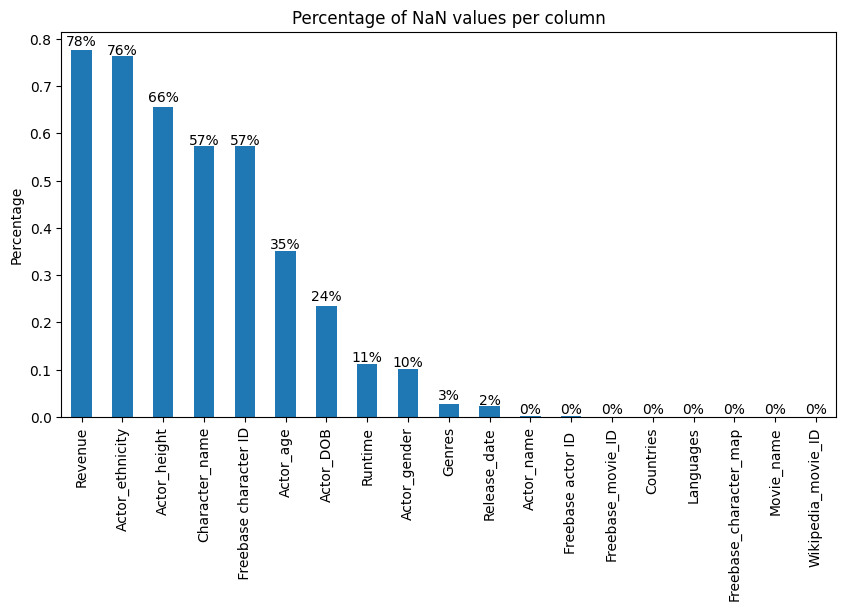

In [19]:
# Plot the percentage of NaN values in % per column, noting the percentage at the top of each bar

plt.figure(figsize=(10, 5))

df.isnull().mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Percentage of NaN values per column')
plt.ylabel('Percentage')
for i, val in enumerate(df.isnull().mean().sort_values(ascending=False).round(2)):
    plt.text(i, val, f'{val*100:.0f}%', ha='center', va='bottom')

plt.show()

In [20]:
# Make a copy of df, and drop the lines of the copy with nan values. Compare the number of lines in df and in the copy
df_copy = df.dropna()
print("df size:", df.shape)
print("df_copy size:", df_copy.shape)

#print the percentage of lines lost 
print("percentage of lines lost:", (df.shape[0] - df_copy.shape[0]) / df.shape[0] * 100)


df size: (450652, 19)
df_copy size: (20053, 19)
percentage of lines lost: 95.55022500732272


In [21]:
# how to determine  columns that  are categorical and which are numerical?
# Categorical columns have a limited number of unique values, while numerical columns have a wide range of values.

# Define a function to determine the type of each column
def get_column_types(df):
    column_types = {}
    for column in df.columns:
        if df[column].dtype == 'object':
            unique_values = df[column].nunique()
            if unique_values / len(df[column]) < 0.05 or unique_values < 10:
                column_types[column] = 'categorical'
            else:
                column_types[column] = 'text'
        else:
            column_types[column] = 'numerical'
    return column_types

# Apply the function to the DataFrame
column_types = get_column_types(df)
column_types


{'Wikipedia_movie_ID': 'numerical',
 'Freebase_movie_ID': 'text',
 'Movie_name': 'text',
 'Release_date': 'categorical',
 'Revenue': 'numerical',
 'Runtime': 'numerical',
 'Languages': 'categorical',
 'Countries': 'categorical',
 'Genres': 'categorical',
 'Character_name': 'text',
 'Actor_DOB': 'text',
 'Actor_gender': 'categorical',
 'Actor_height': 'numerical',
 'Actor_ethnicity': 'categorical',
 'Actor_name': 'text',
 'Actor_age': 'numerical',
 'Freebase_character_map': 'text',
 ' Freebase character ID': 'text',
 'Freebase actor ID ': 'text'}

### Distribution


### Transforming object to datetime


In [22]:
# Looking at my data types, I see that the Release_date column is an object. I will convert it to a datetime object.

#df['Release_date'] = pd.to_datetime(df['Release_date'], errors='coerce')


# Actor_DOB is also an object. I will convert it to a datetime object.
df['Actor_DOB'] = pd.to_datetime(df['Actor_DOB'], errors='coerce')

# Runtime is an float. I will convert it to a time value.
df['Runtime'] = pd.to_timedelta(df['Runtime'], errors='coerce')

In [23]:
df.describe()

,Wikipedia_movie_ID,Revenue,Runtime,Actor_DOB,Actor_height,Actor_age
count,4.506520e+05,1.010110e+05,400182,329874,154815.000000,292543.000000
mean,1.397024e+07,6.941638e+07,0 days 00:00:00.000000128,1943-05-29 06:43:28.836100864,1.788896,37.788270
min,3.300000e+02,1.000000e+04,0 days 00:00:00,1796-09-20 00:00:00,0.610000,-7896.000000
25%,3.759392e+06,3.600000e+06,0 days 00:00:00.000000088,1922-09-01 00:00:00,1.676400,28.000000
50%,1.189156e+07,1.785493e+07,0 days 00:00:00.000000097,1948-02-25 00:00:00,1.750000,36.000000
75%,2.366501e+07,6.696699e+07,0 days 00:00:00.000000112,1966-07-11 00:00:00,1.830000,47.000000
max,3.750192e+07,2.782275e+09,0 days 00:00:00.001079281,2011-09-02 00:00:00,510.000000,103.000000
std,1.079653e+07,1.469650e+08,0 days 00:00:00.000005394,NaN,4.380067,20.588105


### Number of movies per year

In [24]:
import seaborn as sns

In [25]:
# convertine the Release_date to a datetime object
df['Release_date'] = pd.to_datetime(df['Release_date'], errors='coerce')

In [26]:
df['Release_date'].dtype

dtype('<M8[ns]')

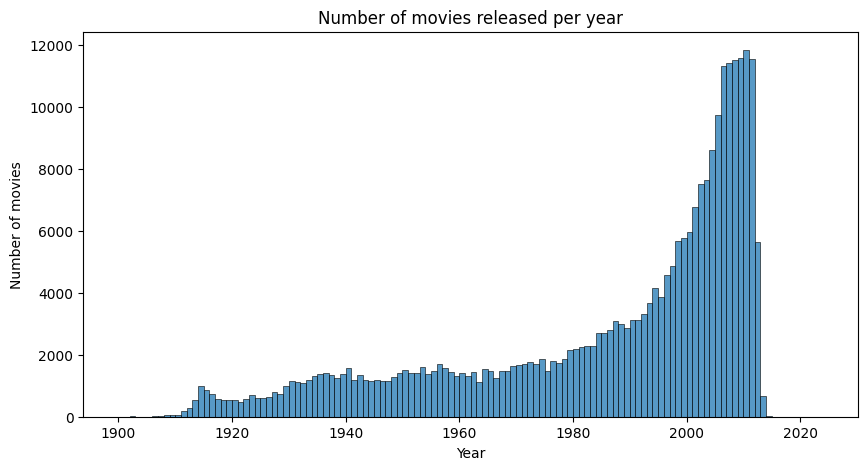

In [27]:
# Visualizing the Release_date column information with sns with the number of movies on the top of each bar
plt.figure(figsize=(10, 5))
sns.histplot(df['Release_date'].dt.year.dropna(), bins=range(1900, 2025, 1), kde=False)
plt.title('Number of movies released per year')
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.show()


### Movies accross the world

In [28]:
# grouping the movies by country
movies_by_country = df['Countries'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Country')
movies_by_country = movies_by_country[movies_by_country != ''].value_counts()


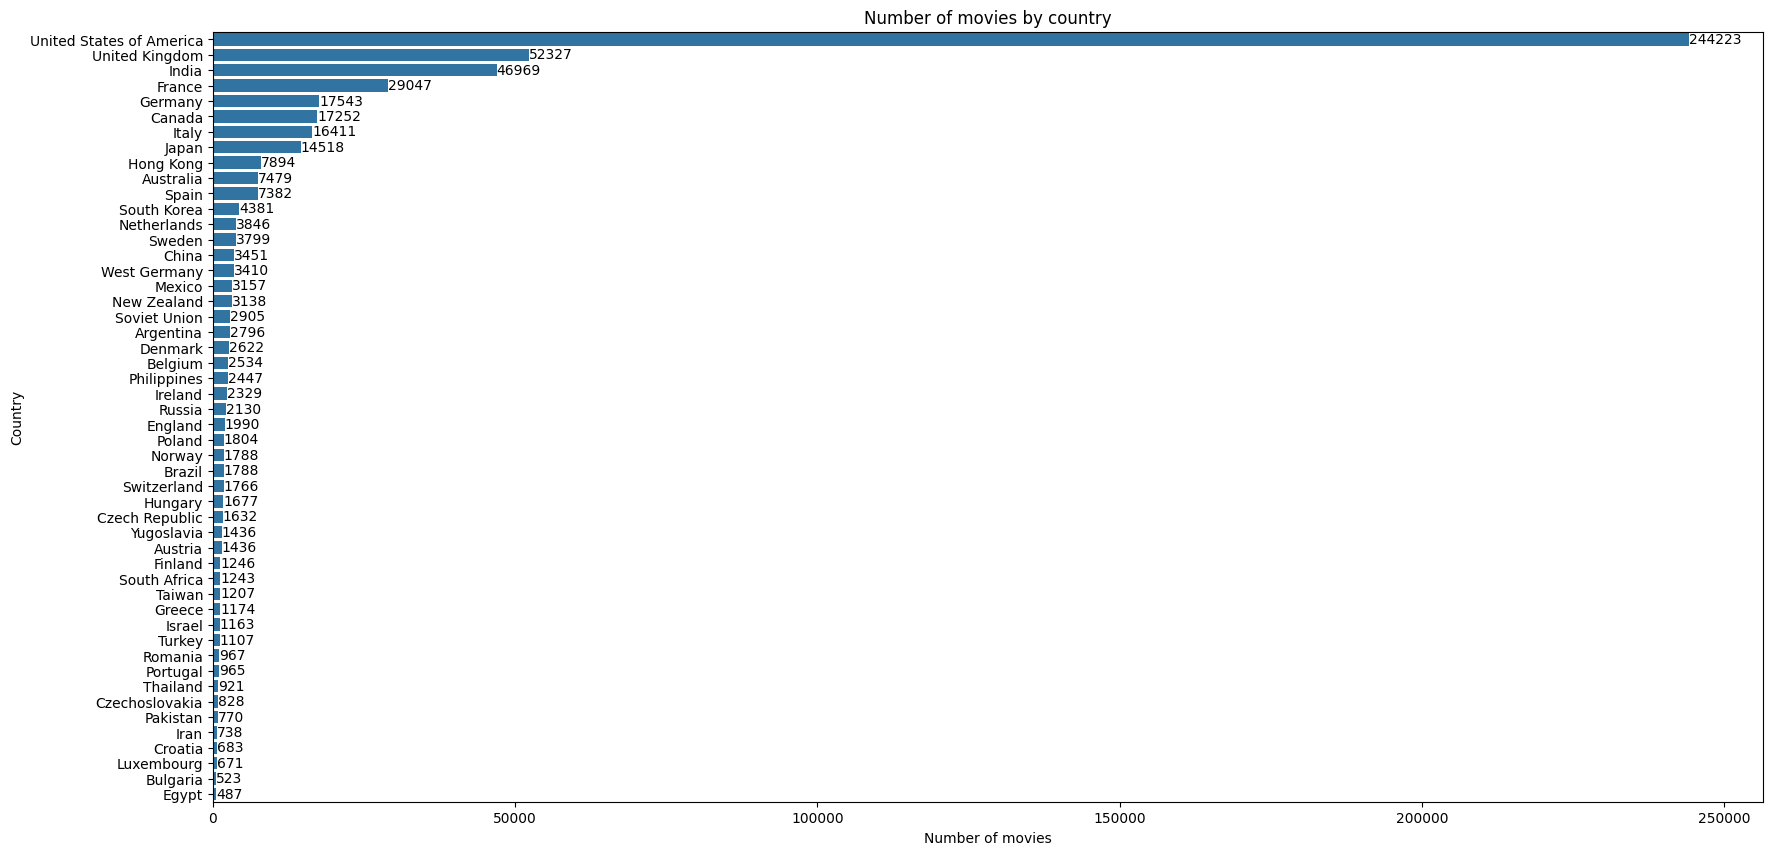

In [29]:
#visualizing the number of movies by country with sns 
# if the count is under a certain threshold (e.g. 100), you can filter it out to avoid cluttering the plot
# add the count at the top of each bar

plt.figure(figsize=(20, 10))
sns.barplot(x=movies_by_country.head(50), y=movies_by_country.head(50).index)

for i, val in enumerate(movies_by_country.head(50)):
    plt.text(val, i, val, ha='left', va='center')

plt.title('Number of movies by country')
plt.xlabel('Number of movies')
plt.ylabel('Country')
plt.show()






Revenue column information:
Type: float64
Number of NaN values: 349641
Number of unique values: 7221
Unique values: [      nan  3600000. 10161099. ...  6944471. 22886222.  1847671.]


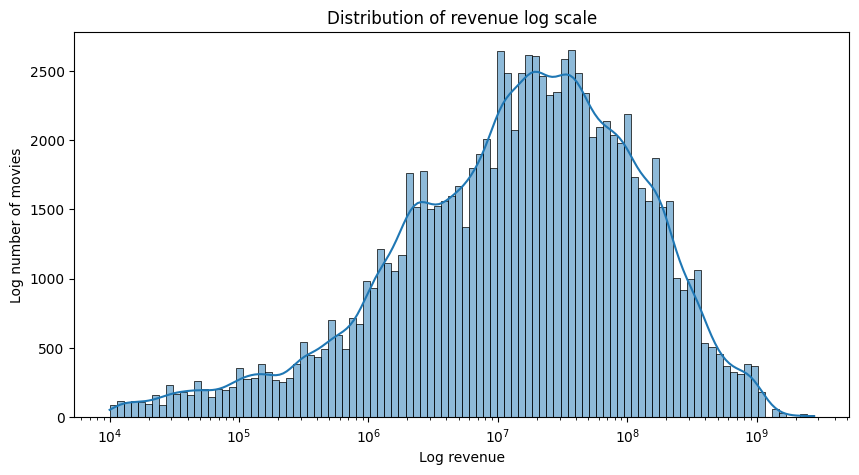

In [30]:
# Information about the Revenue column
print("Revenue column information:")
print("Type:", df['Revenue'].dtype)
print("Number of NaN values:", df['Revenue'].isnull().sum())
print("Number of unique values:", df['Revenue'].nunique())
print("Unique values:", df['Revenue'].unique())

#Visualizing the Revenue column information with sns, adapting the number of bins to the range of the data, and cutting the x-axis to avoid outliers
plt.figure(figsize=(10, 5))
sns.histplot(df['Revenue'].dropna(), kde=True, bins=100, log_scale=True)
plt.title('Distribution of revenue log scale')
plt.xlabel('Log revenue')
plt.ylabel('Log number of movies')
plt.show()


In [31]:
# Top 100 best movies by revenue by grouping the movies by revenue and selecting the top 100
# Avoiding redundancy, grouping the movies by revenue and selecting the top 100
top_100_movies_by_revenue = df.groupby('Movie_name').first().sort_values('Revenue', ascending=False)
top_100_movies_by_revenue.head(100)

# Visualizing the top 100 best movies by revenue with sns, using a horizontal bar plot



,Wikipedia_movie_ID,Freebase_movie_ID,Release_date,Revenue,Runtime,Languages,Countries,Genres,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age,Freebase_character_map,Freebase character ID,Freebase actor ID
Movie_name,,,,,,,,,,,,,,,,,,
Avatar,4273140,/m/0bth54,2009-12-10,2.782275e+09,0 days 00:00:00.000000178,"English, Spanish","United States of America, United Kingdom","Thriller, Science Fiction, Adventure, Computer...",Eytukan,1947-12-17,M,1.83,/m/0dbxy,Wes Studi,61.0,/m/06whd_2,/m/09jw1dp,/m/082bkm
Titanic,2052143,/m/06hqw7,1943-11-10,2.185372e+09,0 days 00:00:00.000000085,German,Germany,"Disaster, Propaganda film, Drama, World cinema...",Rose DeWitt Bukater,1909-12-02,F,1.69,/m/02w7gg,Sybille Schmitz,33.0,/m/0k75hl,/m/062bf_,/m/07z5c0
Harry Potter and the Deathly Hallows – Part 2,31941988,/m/0gvsynb,2011-07-07,1.328111e+09,0 days 00:00:00.000000130,English,"United States of America, United Kingdom","Drama, Mystery, Fantasy, Adventure",Argus Filch,1942-04-17,M,1.68,/m/0d7wh,David Bradley,69.0,/m/0hj5cgp,/m/01y4dw,/m/071ymj
Transformers: Dark of the Moon,25001260,/m/0872p_c,2011-06-23,1.123747e+09,0 days 00:00:00.000000157,English,United States of America,"Alien Film, Science Fiction, Action, Adventure",Charlotte Mearing,1957-06-23,F,1.65,/m/041rx,Frances McDormand,53.0,/m/0b_qvbm,/m/0gm6_j7,/m/01p7yb
The Lord of the Rings: The Return of the King,174251,/m/017jd9,2003-12-17,1.119930e+09,0 days 00:00:00.000000250,"Old English language, English","United States of America, New Zealand","Fantasy Adventure, Adventure, Epic, Action/Adv...",Mercenary On Boat,1961-10-31,M,1.69,/m/02jvpv,Peter Jackson,42.0,/m/0h2bh6q,/m/0h2bh6v,/m/0js9s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
How to Train Your Dragon,18394730,/m/04f52jw,2010-03-18,4.948788e+08,0 days 00:00:00.000000098,English,United States of America,"Adventure, Computer Animation, Animation, Fant...",Spitelout,1971-04-18,M,1.85,/m/03lmx1,David Tennant,38.0,/m/0cg8xlv,/m/0dg70d2,/m/05m7zg
Twister,8930957,/m/027q4dg,1996-05-10,4.944715e+08,0 days 00:00:00.000000093,English,United States of America,"Black comedy, Film adaptation, Drama, Comedy, ...",Chris,1914-02-05,M,1.83,/m/033tf_,William S. Burroughs,33.0,/m/03lxsfh,/m/0h5hc75,/m/08433
Clash of the Titans,22358819,/m/05szq8z,2010-03-26,4.932150e+08,0 days 00:00:00.000000096,English,"United States of America, United Kingdom","Adventure, Remake, Action/Adventure, Fantasy, ...",Eusabios,1989-12-07,M,1.89,/m/02w7gg,Nicholas Hoult,20.0,/m/08ngw0k,/m/0bcjnj6,/m/06tjh6


In [32]:
# Which movies have the highest revenue decade by decade?
# Adding a column with the decade of the release date
df['Decade'] = df['Release_date'].dt.year // 10 * 10    

# Grouping the movies by decade and movie name, and selecting the first movie for each group
top_movies_by_decade = df.groupby(['Decade', 'Movie_name']).first().sort_values('Revenue', ascending=False).reset_index()


# Visualing for each deacade the top movies by revenue with sns, using a horizontal bar plot





# Looking genres evolution



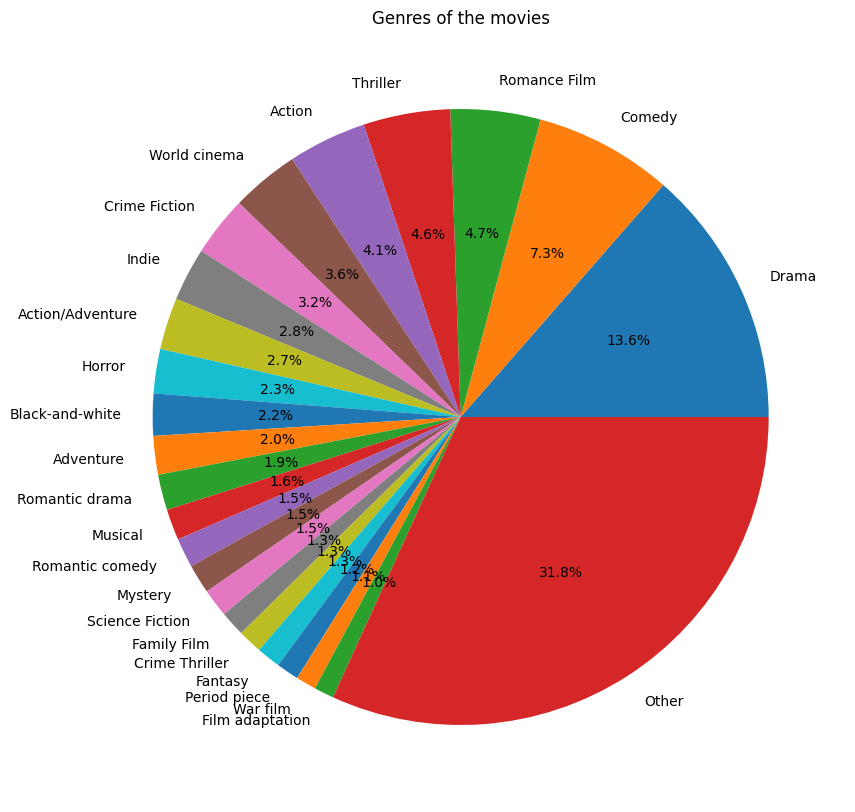

In [33]:
# Visualizing the genres of the movies with a pie chart (under 1% grouped as 'Other')



# Grouping the movies by genre and counting the number of movies in each genre
movies_by_genre = df['Genres'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Genre')
movies_by_genre = movies_by_genre[movies_by_genre != ''].value_counts()

# Grouping the genres with less than 1% of the total number of movies as 'Other'
threshold = 0.01
total_movies = movies_by_genre.sum()
movies_by_genre = movies_by_genre[movies_by_genre / total_movies > threshold]
movies_by_genre['Other'] = total_movies - movies_by_genre.sum()



# Visualizing the genres of the movies with a pie chart
plt.figure(figsize=(10, 10))
plt.pie(movies_by_genre, labels=movies_by_genre.index, autopct='%1.1f%%')
plt.title('Genres of the movies')
plt.show()
